In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv').drop(columns='Loan_ID')
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# Categorical

In [6]:
df.select_dtypes('object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


## Credit History

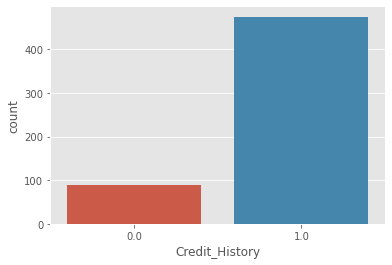

In [7]:
sns.countplot(data=df, x='Credit_History',);

Most people have Credit History

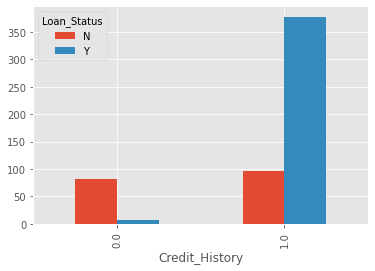

In [8]:
pd.crosstab(df.Credit_History, df.Loan_Status).plot.bar();

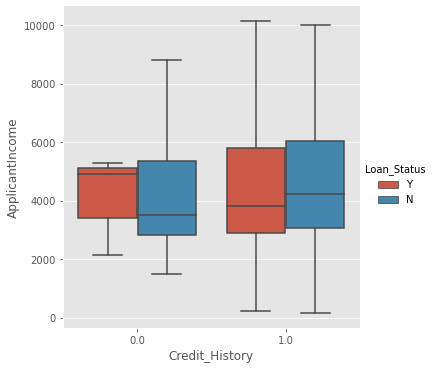

In [9]:
sns.catplot(x='Credit_History', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

Understandably, Credit History is a very good predictor of Loan Status

## Gender

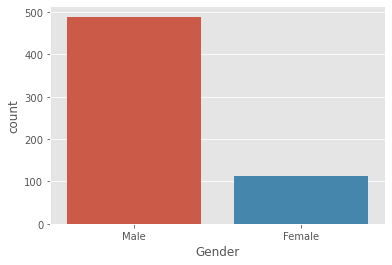

In [10]:
sns.countplot(data=df, x='Gender');

Most applicants are Male

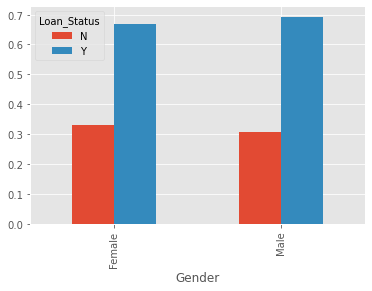

In [11]:
pd.crosstab(df.Gender, df.Loan_Status, normalize='index').plot.bar();

Males and Females tend to be approved for loans at the same proportions

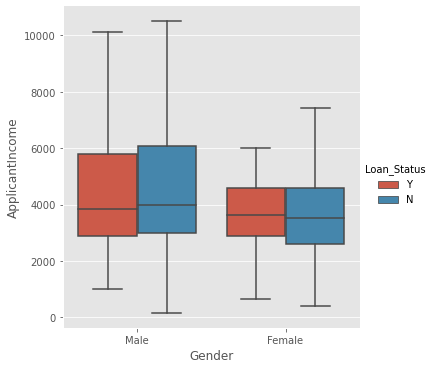

In [12]:
sns.catplot(x='Gender', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

Males tend to have higher incomes. Income seems to be more important for a male to be approved than a female.

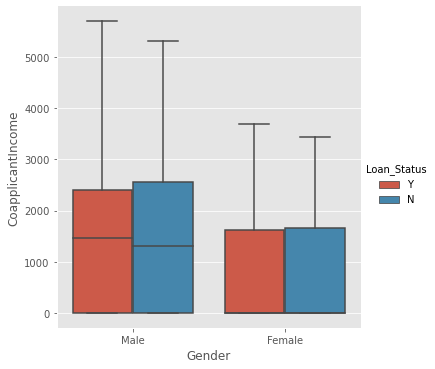

In [13]:
sns.catplot(x='Gender', y='CoapplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

Coapplicant income seems to not be very important for females to get approved for loans. But is important for males.

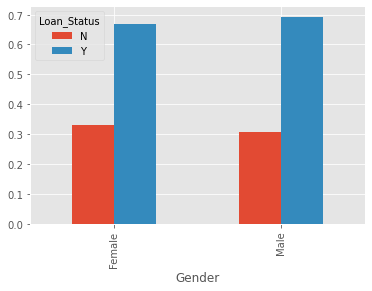

In [14]:
pd.crosstab(df.Gender, df.Loan_Status, values=df.Self_Employed	, aggfunc=np.count_nonzero, normalize='index').plot.bar();

Males and Females are just as likely to be Self Employed

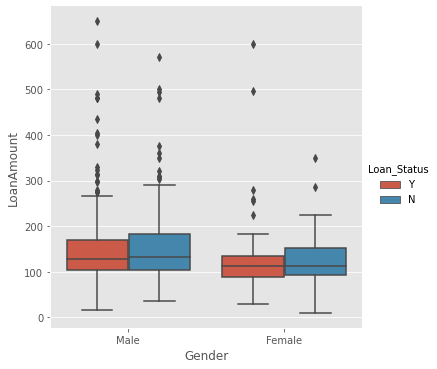

In [15]:
sns.catplot(x='Gender', y='LoanAmount', hue='Loan_Status', data=df, kind='box');

Males tend to ask for larger loan amounts. The IQR of loan amounts for accepted application tend to be smaller, but they also have more extreme outliers.

## Marital status

<AxesSubplot:xlabel='Married', ylabel='count'>

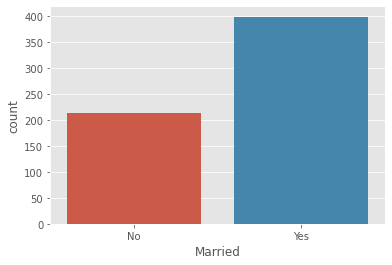

In [16]:
sns.countplot(data=df, x='Married')

Most applicants are Married

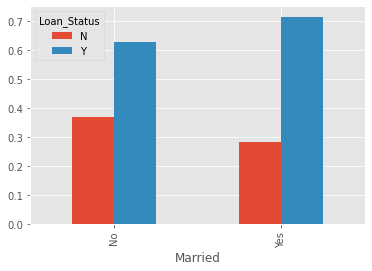

In [17]:
pd.crosstab(df.Married, df.Loan_Status, normalize='index').plot.bar();

Married idividuals are more likely to be approved

In [18]:
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

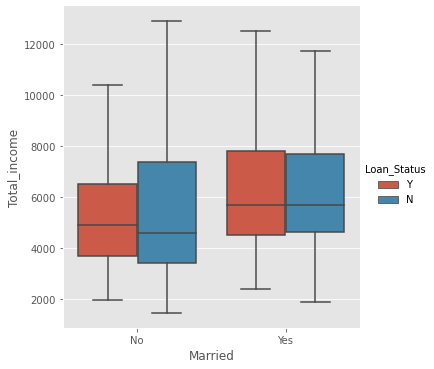

In [19]:
sns.catplot(x='Married', y='Total_income', hue='Loan_Status', data=df, kind='box', showfliers=False);

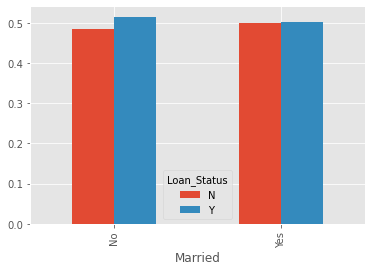

In [20]:
pd.crosstab(df.Married, df.Loan_Status, values=df.Total_income, aggfunc=np.median, normalize='index').plot.bar();

Married status improves odds of Loan approval when total income is considered



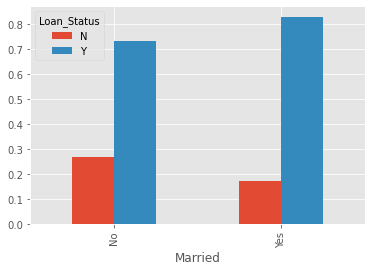

In [21]:
pd.crosstab(df.Married, df.Loan_Status, values=df.Credit_History, aggfunc=np.sum, normalize='index').plot.bar();

Married individuals are more likely to have a Credit History

In [22]:
df[(df['Married'] == 'No') & (df['Loan_Status'] == 'N')]['Credit_History'].sum()

45.0

## Dependents

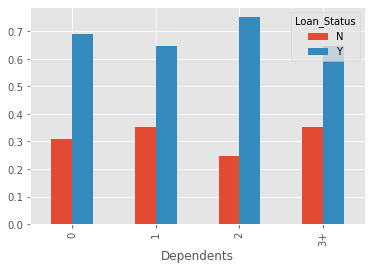

In [23]:
pd.crosstab(df.Dependents, df.Loan_Status, normalize='index').plot.bar();

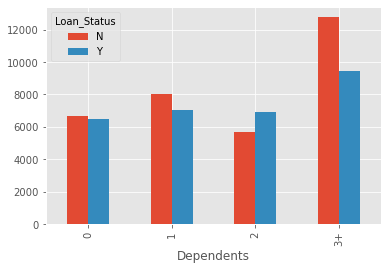

In [24]:
pd.crosstab(df.Dependents, df.Loan_Status, values=df.Total_income, aggfunc=np.mean, ).plot.bar();

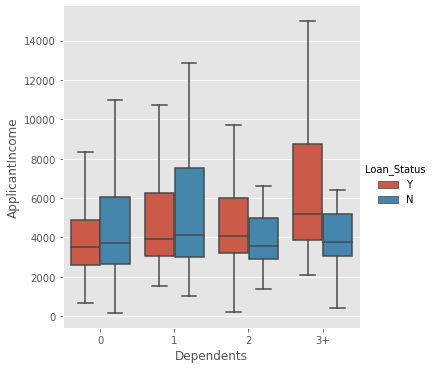

In [25]:
sns.catplot(x='Dependents', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

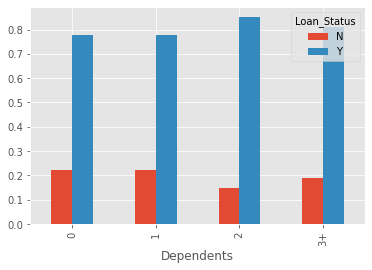

In [26]:
pd.crosstab(df.Dependents, df.Loan_Status, values=df.Credit_History, aggfunc=np.sum, normalize='index').plot.bar();

People with 2 children are more likely to have Credit History, which leads to better Loan Status

## Education

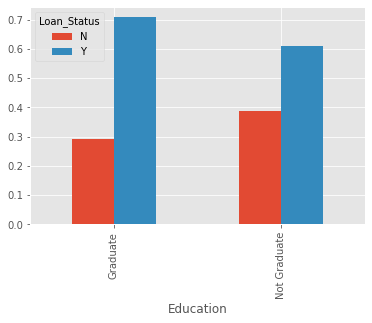

In [27]:
pd.crosstab(df.Education, df.Loan_Status, normalize='index').plot.bar();

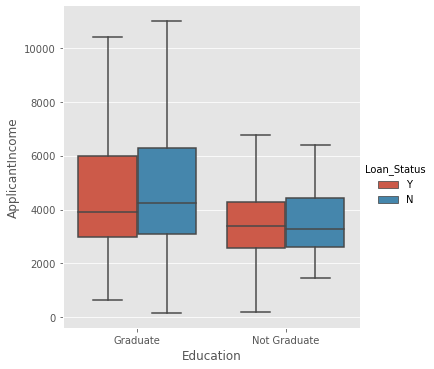

In [28]:
sns.catplot(x='Education', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

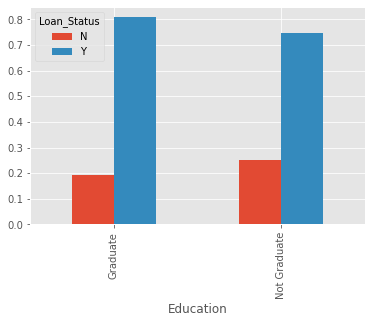

In [29]:
pd.crosstab(df.Education, df.Loan_Status, values=df.Credit_History, aggfunc=np.sum,normalize='index').plot.bar();

People who are Graduates have higher income and are more likely to have credit history

## Employment

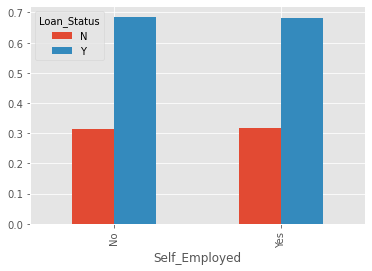

In [30]:
pd.crosstab(df.Self_Employed, df.Loan_Status, normalize='index').plot.bar();

Self employment does not change the odds of loan approval

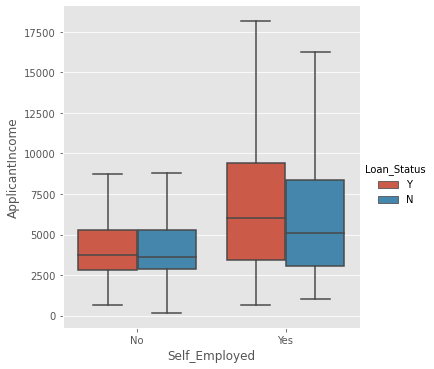

In [31]:
sns.catplot(x='Self_Employed', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

Self employed individuals have higher incomes

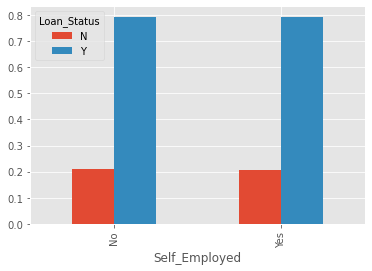

In [32]:
pd.crosstab(df.Self_Employed, df.Loan_Status, values=df.Credit_History, aggfunc=np.sum, normalize='index').plot.bar();

Odds of having credit history as just as likely between employment types

## Property Type

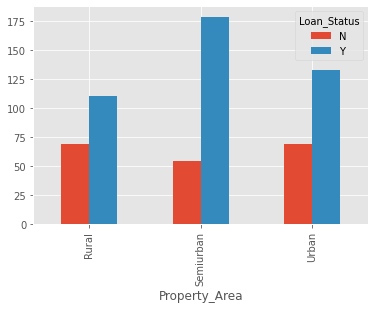

In [33]:
pd.crosstab(df.Property_Area, df.Loan_Status).plot.bar();

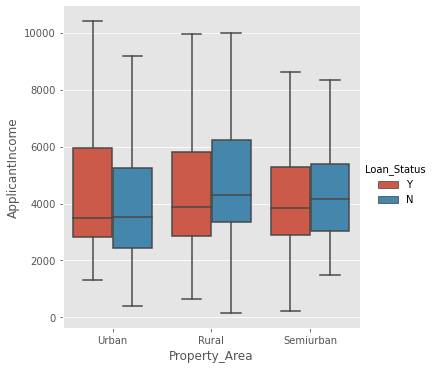

In [34]:
sns.catplot(x='Property_Area', y='ApplicantIncome', hue='Loan_Status', data=df, kind='box', showfliers=False);

Suburban property owners tend to have higher income.

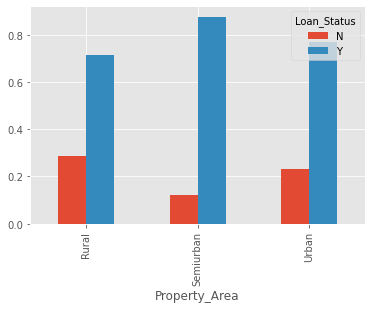

In [35]:
pd.crosstab(df.Property_Area, df.Loan_Status, values=df.Credit_History, aggfunc=np.sum, normalize='index').plot.bar();

Individuals with Sub-Urban property are more likely to have credit history

# Numeric

In [36]:
df.select_dtypes('number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_income
0,5849,0.0,NaN,360.0,1.0,5849.0
1,4583,1508.0,128.0,360.0,1.0,6091.0
2,3000,0.0,66.0,360.0,1.0,3000.0
3,2583,2358.0,120.0,360.0,1.0,4941.0
4,6000,0.0,141.0,360.0,1.0,6000.0
...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,2900.0
610,4106,0.0,40.0,180.0,1.0,4106.0
611,8072,240.0,253.0,360.0,1.0,8312.0
612,7583,0.0,187.0,360.0,1.0,7583.0


## Applicant Income

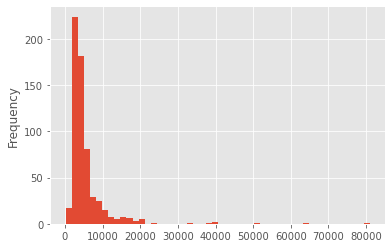

In [37]:
df.ApplicantIncome.plot.hist(bins=50);

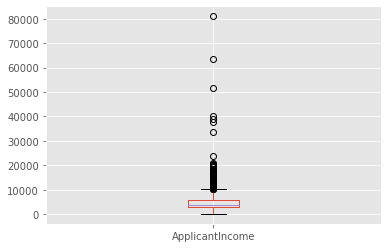

In [38]:
df.ApplicantIncome.plot.box();

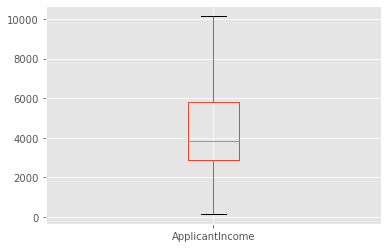

In [39]:
df.ApplicantIncome.plot.box(showfliers=False);

Skewed distribution of income, with many outliers



In [40]:
df.groupby(by='Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [41]:
df.groupby(by='Loan_Status')['ApplicantIncome'].median()

Loan_Status
N    3833.5
Y    3812.5
Name: ApplicantIncome, dtype: float64

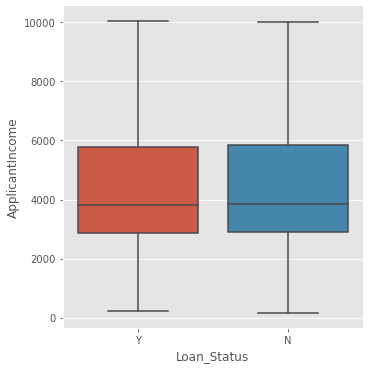

In [42]:
sns.catplot(x='Loan_Status', y='ApplicantIncome',  data=df, kind='box', showfliers=False);

Center of incomes of people approved for loans is lower than those who are rejected. Seeming to indicate Income is not the most important factor, or bank prefers to invest in small investors.

## Coapplicant Income

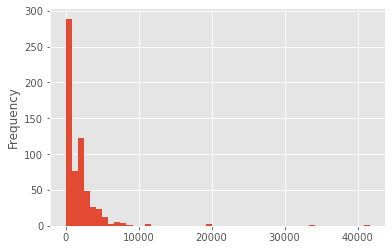

In [43]:
df.CoapplicantIncome.plot.hist(bins=50);

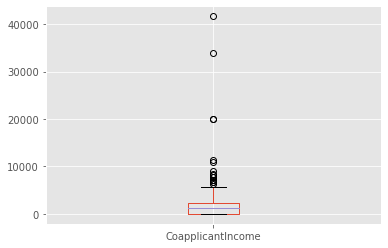

In [44]:
df.CoapplicantIncome.plot.box();

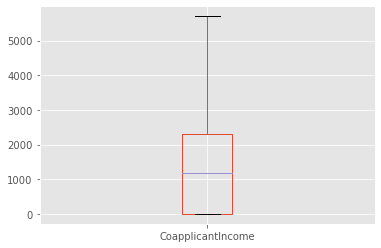

In [45]:
df.CoapplicantIncome.plot.box(showfliers=False);

Coapplicant incom is also skewed, this time with a lot of of zero values

In [46]:
df.groupby(by='Loan_Status')['CoapplicantIncome'].mean()

Loan_Status
N    1877.807292
Y    1504.516398
Name: CoapplicantIncome, dtype: float64

In [47]:
df.groupby(by='Loan_Status')['CoapplicantIncome'].median()

Loan_Status
N     268.0
Y    1239.5
Name: CoapplicantIncome, dtype: float64

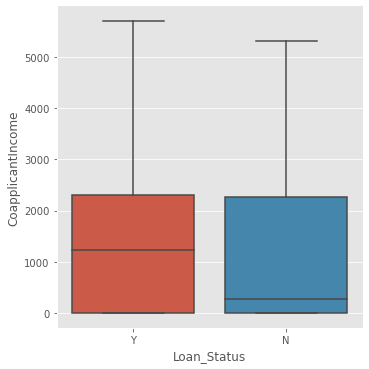

In [48]:
sns.catplot(x='Loan_Status', y='CoapplicantIncome', data=df, kind='box', showfliers=False);

The median of those approved had higher coaplicant incomes. Indicating a source of a second income is an important factor.

## Loan Amount

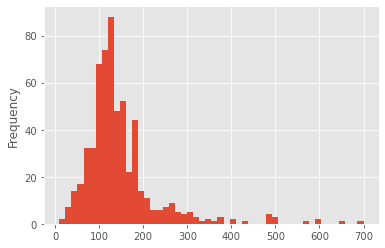

In [49]:
df.LoanAmount.plot.hist(bins=50);

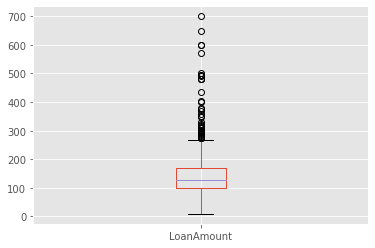

In [50]:
df.LoanAmount.plot.box();

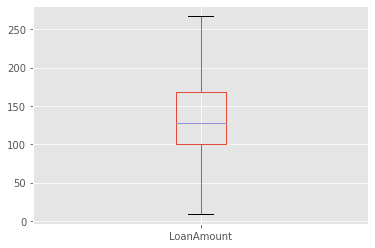

In [51]:
df.LoanAmount.plot.box(showfliers=False);

Skewed distribution. Loan amount distribution looks more normal than the income distributions. 

In [52]:
df.groupby(by='Loan_Status')['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [53]:
df.groupby(by='Loan_Status')['LoanAmount'].median()

Loan_Status
N    129.0
Y    126.0
Name: LoanAmount, dtype: float64

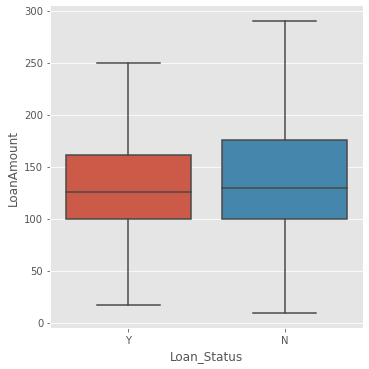

In [54]:
sns.catplot(x='Loan_Status', y='LoanAmount',data=df, kind='box', showfliers=False);

Center and spread of loan amounts for people who are approved, is higher than those who are rejected. Indicating bank prefers to give out smaller loans.



## Loan Amount Term

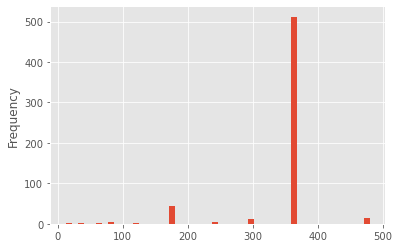

In [55]:
df.Loan_Amount_Term.plot.hist(bins=50);

In [56]:
df.groupby(by='Loan_Status')['Loan_Amount_Term'].mean()

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [57]:
df.groupby(by='Loan_Status')['Loan_Amount_Term'].median()

Loan_Status
N    360.0
Y    360.0
Name: Loan_Amount_Term, dtype: float64

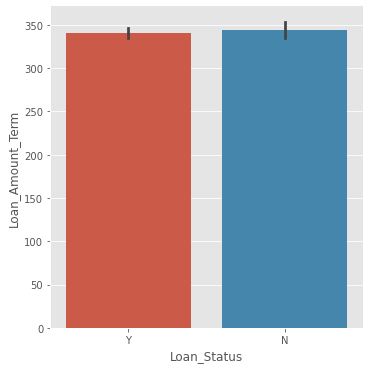

In [58]:
sns.catplot(x='Loan_Status', y='Loan_Amount_Term',  data=df, kind='bar', );

Center of Loan Amount Term for those approved for a loan is slightly lower than those rejected for a loan. Indicating bank prefers short, low-risk investing.

# Ending Thoughts and Reflections
- I suspect Property Area contains hidden information about applicant demographics
Like race and age
-This bias should be investigated further to question it's appropriateness as a qualifier for loans